In [1]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import defaultdict
import os
from tqdm import tqdm
from scipy.stats import entropy
%matplotlib inline

# Prompt datasets
# Look at the predicted languages from Large Language models at line level

In [2]:
df_word = pd.read_csv("../datasets/prompts_language_confusion/lang2dist/word_level.csv")
df_line = pd.read_csv("../datasets/prompts_language_confusion/lang2dist/line_level.csv")

In [5]:
df_line.head(2)

,model,pred_langs,name,idx,LLM,task,lang,source
0,0_command-r_monolingual_ar_okapi,{'ara': [1.0]},0_command-r_monolingual_ar_okapi,0,command-r,monolingual,ar,okapi
1,1_command-r_monolingual_ar_okapi,{'ara': [1.0]},1_command-r_monolingual_ar_okapi,1,command-r,monolingual,ar,okapi


In [10]:
df_word.rename(columns={"pred_langs":"word_level_pred_langs"},inplace=True)
df_line.rename(columns={"pred_langs":"line_level_pred_langs"},inplace=True)

In [17]:
df_merge = pd.merge(df_line, df_word, on=["model", "LLM", "lang", "source", "idx", "task", "name"], how="outer")

In [19]:
df_merge.to_csv("../datasets/prompts_language_confusion/lang2dist/all.csv",index=False)

In [228]:
code2lang = {
    'ar': 'ara',
    'de': 'deu',
    'en': 'eng',
    'es': 'spa',
    'fr': 'fra',
    'hi': 'hin',
    'id': 'ind',
    'it': 'ita',
    'ja': 'jpn',
    'ko': 'kor',
    'pt': 'por',
    'ru': 'rus',
    'tr': 'tur',
    'vi': 'vie',
    'zh': 'zho'
}
iso3names = {
    'ara': 'Arabic',
    'deu': 'German',
    'eng': 'English',
    'spa': 'Spanish',
    'fra': 'French',
    'hin': 'Hindi',
    'ind': 'Indonesian',
    'ita': 'Italian',
    'jpn': 'Japanese',
    'kor': 'Korean',
    'por': 'Portuguese',
    'rus': 'Russian',
    'tur': 'Turkish',
    'vie': 'Vietnamese',
    'zho': 'Chinese'
}


In [229]:
df_word["lang"]=df_word["lang"].map(code2lang)
df_line["lang"]=df_line["lang"].map(code2lang)

In [21]:
df_word.head(2)

,model,word_level_pred_langs,name,idx,LLM,task,lang,source
0,0_command-r_monolingual_ar_okapi,"{'ara': [0.9], 'urd': [0.02], 'fas': [0.08]}",0_command-r_monolingual_ar_okapi,0,command-r,monolingual,ar,okapi
1,1_command-r_monolingual_ar_okapi,"{'ara': [0.98], 'urd': [0.02]}",1_command-r_monolingual_ar_okapi,1,command-r,monolingual,ar,okapi


In [6]:
df_word["pred_langs"] = df_word["pred_langs"].apply(literal_eval)
df_line["pred_langs"] = df_line["pred_langs"].apply(literal_eval)

In [7]:
pd.set_option('display.max_columns', None)

# Entropy

In [8]:
def get_entropy(x):
    arr = np.array([i[0] for i in list(x.values())])
    return entropy(arr)

In [9]:
df_word["entropy"]= df_word["pred_langs"].apply(get_entropy)

In [10]:
df_line["entropy"]= df_line["pred_langs"].apply(get_entropy)

In [12]:
df_line.head(2)

,model,pred_langs,name,idx,LLM,task,lang,source,entropy
0,0_command-r_monolingual_ar_okapi,{'ara': [1.0]},0_command-r_monolingual_ar_okapi,0,command-r,monolingual,ara,okapi,0.0
1,1_command-r_monolingual_ar_okapi,{'ara': [1.0]},1_command-r_monolingual_ar_okapi,1,command-r,monolingual,ara,okapi,0.0


In [28]:
df_line_mono = df_line[df_line["task"]=="monolingual"]
df_line_mono[df_line_mono["entropy"]>0]

,model,pred_langs,name,idx,LLM,task,lang,source,entropy
16,16_command-r_monolingual_ar_okapi,"{'ara': [0.67], 'fas': [0.33]}",16_command-r_monolingual_ar_okapi,16,command-r,monolingual,ara,okapi,0.634179
129,29_command-r_monolingual_de_okapi,"{'fra': [0.33], 'deu': [0.67]}",29_command-r_monolingual_de_okapi,29,command-r,monolingual,deu,okapi,0.634179
135,35_command-r_monolingual_de_okapi,"{'eng': [0.11], 'deu': [0.78], 'unknown': [0.11]}",35_command-r_monolingual_de_okapi,35,command-r,monolingual,deu,okapi,0.679400
147,47_command-r_monolingual_de_okapi,"{'deu': [0.71], 'fas': [0.14], 'dan': [0.14]}",47_command-r_monolingual_de_okapi,47,command-r,monolingual,deu,okapi,0.791646
149,49_command-r_monolingual_de_okapi,"{'unknown': [0.25], 'deu': [0.75]}",49_command-r_monolingual_de_okapi,49,command-r,monolingual,deu,okapi,0.562335
...,...,...,...,...,...,...,...,...,...
61092,56_llama-3-instruct_monolingual_ru_dolly_human...,"{'eng': [0.75], 'unknown': [0.25]}",56_llama-3-instruct_monolingual_ru_dolly-human...,56,llama-3-instruct,monolingual,rus,dolly-human-edited,0.562335
61110,74_llama-3-instruct_monolingual_ru_dolly_human...,"{'rus': [0.5], 'bul': [0.5]}",74_llama-3-instruct_monolingual_ru_dolly-human...,74,llama-3-instruct,monolingual,rus,dolly-human-edited,0.693147
61111,75_llama-3-instruct_monolingual_ru_dolly_human...,"{'rus': [0.8], 'mon': [0.1], 'ukr': [0.1]}",75_llama-3-instruct_monolingual_ru_dolly-human...,75,llama-3-instruct,monolingual,rus,dolly-human-edited,0.639032
61121,85_llama-3-instruct_monolingual_ru_dolly_human...,"{'rus': [0.29], 'nld': [0.29], 'unknown': [0.2...",85_llama-3-instruct_monolingual_ru_dolly-human...,85,llama-3-instruct,monolingual,rus,dolly-human-edited,1.348769


# group by multilingual model at line level

In [22]:
df=  pd.read_csv("../results/prompting_language_confusion/dataframes/all_weighted_entropy.csv")

In [23]:
df

,Unnamed: 0,model,line_level_pred_langs,name,idx,LLM,task,lang,source,word_level_pred_langs,line_level_pred_langs_dist,word_level_pred_langs_dist,line_level_weighted_entropy,word_level_weighted_entropy
0,0,0_command-r-base_crosslingual_ar_complex_prompts,{'eng': [1.0]},0_command-r-base_crosslingual_ar_complex-prompts,0,command-r-base,crosslingual,ara,complex-prompts,"{'eng': [0.89], 'tsn': [0.11]}",{'eng': 1.0},"{'eng': 0.89, 'tsn': 0.11}",0.0,0.346515
1,1,0_command-r-base_crosslingual_ar_okapi,{'eng': [1.0]},0_command-r-base_crosslingual_ar_okapi,0,command-r-base,crosslingual,ara,okapi,{'eng': [1.0]},{'eng': 1.0},{'eng': 1.0},0.0,0.000000
2,2,0_command-r-base_crosslingual_ar_sharegpt,{'eng': [1.0]},0_command-r-base_crosslingual_ar_sharegpt,0,command-r-base,crosslingual,ara,sharegpt,"{'eng': [0.98], 'gle': [0.02]}",{'eng': 1.0},"{'eng': 0.98, 'gle': 0.02}",0.0,0.098039
3,3,0_command-r-base_crosslingual_de_complex_prompts,{'eng': [1.0]},0_command-r-base_crosslingual_de_complex-prompts,0,command-r-base,crosslingual,deu,complex-prompts,{'eng': [1.0]},{'eng': 1.0},{'eng': 1.0},0.0,0.000000
4,4,0_command-r-base_crosslingual_de_okapi,{'eng': [1.0]},0_command-r-base_crosslingual_de_okapi,0,command-r-base,crosslingual,deu,okapi,"{'eng': [0.94], 'ita': [0.04], 'deu': [0.02]}",{'eng': 1.0},"{'eng': 0.94, 'ita': 0.04, 'deu': 0.02}",0.0,4.020700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65234,65310,9_mistral-large_monolingual_ru_dolly_human_edited,{'rus': [1.0]},9_mistral-large_monolingual_ru_dolly-human-edited,9,mistral-large,monolingual,rus,dolly-human-edited,"{'rus': [0.84], 'mon': [0.09], 'srp': [0.03], ...",{'rus': 1.0},"{'rus': 0.84, 'mon': 0.09, 'srp': 0.03, 'ukr':...",0.0,0.501057
65235,65311,9_mistral-large_monolingual_tr_aya_human_annot...,{'tur': [1.0]},9_mistral-large_monolingual_tr_aya-human-annot...,9,mistral-large,monolingual,tur,aya-human-annotated,"{'tur': [0.94], 'epo': [0.06]}",{'tur': 1.0},"{'tur': 0.94, 'epo': 0.06}",0.0,0.172517
65236,65312,9_mistral-large_monolingual_vi_okapi,{'eng': [1.0]},9_mistral-large_monolingual_vi_okapi,9,mistral-large,monolingual,vie,okapi,"{'eng': [0.92], 'fra': [0.08]}",{'eng': 1.0},"{'eng': 0.92, 'fra': 0.08}",0.0,0.278769
65237,65313,9_mistral-large_monolingual_zh_aya_human_annot...,{'zho': [1.0]},9_mistral-large_monolingual_zh_aya-human-annot...,9,mistral-large,monolingual,zho,aya-human-annotated,"{'zho': [0.6], 'eng': [0.2], 'fin': [0.2]}",{'zho': 1.0},"{'zho': 0.6, 'eng': 0.2, 'fin': 0.2}",0.0,0.848105


In [26]:
df["line_level_pred_langs_dist"] =df["line_level_pred_langs_dist"].apply(literal_eval)

In [27]:
df= df[df["task"]=="crosslingual"]

In [33]:
def get_reweighted_entropy(eval_lang,pred_langs_dist):
    "Re-weighted entropy"
    reweighted_entropy = 0
    for lang, prob in pred_langs_dist.items():
        if lang == eval_lang:
            reweighted_entropy -= (1 - prob) * np.log(prob)
        else:
            reweighted_entropy -= prob * np.log(prob)
    return reweighted_entropy

In [54]:
def get_norm_entropy(arr):
    total = sum(arr)
    probabilities = [x / total for x in arr]
    # Calculate entropy
    entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)  # Avoid log(0) errors
    return entropy

In [50]:
lang2lang_dist = defaultdict(dict)
for lang, pred_langs in zip(df["lang"], df[f"line_level_pred_langs_dist"]):
    for pred_lang, v in pred_langs.items():
        if pred_lang not in lang2lang_dist[lang]:
            
            lang2lang_dist[lang][pred_lang] = list()
        lang2lang_dist[lang][pred_lang].append(v)


In [45]:
sum([1,2,3])

6

In [38]:
df_lang2lang = pd.DataFrame(lang2lang_dist)

In [43]:
df_lang2lang=df_lang2lang.dropna()

In [48]:
df_lang2lang

,ara,deu,spa,fra,hin,ind,ita,jpn,kor,por,rus,tur,vie,zho
eng,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.91, 0.5, 1.0,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.12, 0.67...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.83,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.11, 0.33...","[0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 0.91,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.08, 0.14...","[1.0, 1.0, 0.83, 1.0, 1.0, 1.0, 1.0, 1.0, 0.11...","[1.0, 1.0, 1.0, 1.0, 0.88, 0.25, 0.5, 1.0, 0.2...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.89...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.89, 1.0, 1.0,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.14, 1.0, 1.0,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.17, 0.14, 1.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.25, 0.5,..."
unknown,"[0.2, 0.14, 0.14, 0.14, 0.14, 0.2, 0.33, 0.14,...","[0.09, 0.14, 0.14, 0.25, 0.2, 0.14, 0.17, 0.2,...","[0.12, 0.12, 0.12, 0.17, 0.29, 0.33, 0.17, 0.1...","[0.12, 0.17, 0.08, 0.17, 0.14, 0.14, 0.14, 0.2...","[0.11, 0.14, 0.14, 0.14, 0.14, 0.2, 0.25, 0.17...","[0.1, 0.1, 0.12, 0.2, 0.14, 0.14, 0.14, 0.2, 0...","[0.22, 0.14, 0.14, 0.14, 0.2, 0.12, 0.17, 0.2,...","[0.17, 0.12, 0.33, 0.14, 0.2, 0.14, 0.14, 0.17...","[0.12, 0.33, 0.2, 0.14, 0.14, 0.14, 0.2, 0.38,...","[0.11, 0.29, 0.14, 0.14, 0.14, 0.2, 0.25, 0.17...","[0.11, 0.17, 0.14, 0.25, 0.17, 0.2, 0.12, 0.17...","[0.14, 0.14, 0.14, 0.14, 0.2, 0.12, 0.17, 0.2,...","[0.2, 0.14, 0.14, 0.14, 0.2, 0.14, 0.17, 0.2, ...","[0.2, 0.14, 0.14, 0.14, 0.2, 0.12, 0.46, 0.17,..."
fra,"[0.33, 0.33, 0.33, 0.33, 0.33, 0.5, 0.17, 0.5,...","[0.33, 0.14, 0.17, 0.2, 0.17, 0.33, 0.17, 0.1,...","[0.33, 0.33, 0.1, 0.17, 0.17, 0.17, 0.29, 0.33...","[0.9, 1.0, 1.0, 0.78, 1.0, 1.0, 0.5, 1.0, 1.0,...","[0.5, 0.2, 0.33, 0.33, 0.17, 0.2, 0.17, 0.33, ...","[0.08, 0.17, 0.5, 0.17, 0.11, 0.33, 0.25, 0.25...","[0.25, 0.33, 0.17, 0.5, 0.2, 0.17, 1.0, 0.5, 0...","[0.12, 0.33, 0.33, 0.33, 0.17, 0.17, 0.2, 0.25...","[0.5, 0.33, 0.33, 0.25, 0.17, 0.5, 0.17, 0.5, ...","[0.11, 0.17, 0.5, 0.33, 1.0, 0.33, 0.33, 0.33,...","[0.33, 0.33, 0.17, 0.25, 0.17, 0.5, 0.5, 0.33,...","[0.33, 0.17, 0.33, 0.5, 0.17, 0.25, 0.2, 0.33,...","[0.25, 0.33, 0.14, 0.33, 0.11, 0.25, 0.2, 0.2,...","[0.33, 0.08, 0.17, 0.17, 0.25, 0.17, 0.33, 0.1..."
unk,"[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0..."
epo,"[0.25, 0.25, 0.33, 0.25, 0.33, 0.17, 0.2, 0.17]","[0.33, 0.25, 0.33, 0.25, 0.14, 0.25, 0.25, 0.2...","[0.17, 0.33, 0.22, 0.17, 0.2, 0.33, 0.33]","[1.0, 0.25, 0.17, 0.08, 0.11, 0.17, 0.17, 0.05...","[0.22, 0.33, 0.25, 0.33, 0.2, 0.5, 0.17, 0.11,...","[0.2, 0.12, 0.17, 0.17, 0.33, 0.33, 0.25, 0.33...","[0.14, 0.17, 0.17, 0.17, 0.17, 0.17, 0.33, 0.11]","[0.22, 0.11, 0.12, 0.33, 0.33, 0.33, 0.33, 0.3...","[1.0, 0.17, 0.17, 0.17, 0.25, 0.33, 0.33, 0.11...","[0.14, 0.25, 0.25, 0.2, 0.2, 0.14, 0.12, 0.17,...","[0.25, 0.33, 0.25, 0.2, 0.2, 0.33, 0.2, 0.17, ...","[0.2, 0.25, 0.25, 0.2, 0.17, 0.2, 0.2, 0.33]","[0.33, 0.25, 0.17, 0.17, 0.2, 0.17, 0.17, 0.17...","[0.25, 0.33, 0.2, 0.33, 0.33, 0.25, 0.17, 0.17..."
mri,"[0.33, 0.25, 0.5, 0.5, 0.17, 0.33]","[0.2, 0.5, 0.5, 0.17, 0.33, 0.17]","[0.2, 0.25, 0.25, 0.5, 0.5]","[0.33, 0.25, 0.5, 0.2, 0.25, 0.2]","[0.5, 0.5, 0.17, 0.25, 0.2, 0.17]","[0.1, 0.5, 0.17, 0.5, 0.17, 0.2]","[0.5, 0.2, 0.17, 0.12]","[0.25, 0.17, 0.2, 0.33, 0.33, 0.33, 0.5, 0.14,...","[0.

In [56]:
df_lang2lang =df_lang2lang.applymap(get_norm_entropy)

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_29948/3641706835.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_lang2lang =df_lang2lang.applymap(get_norm_entropy)


In [57]:
df_lang2lang

,ara,deu,spa,fra,hin,ind,ita,jpn,kor,por,rus,tur,vie,zho
eng,10.526783,10.191447,9.976318,10.060271,10.436893,10.236003,10.131060,10.520721,10.568737,10.032228,10.279344,10.362055,10.391125,10.464002
unknown,7.022638,7.140821,7.821505,7.569156,7.285801,7.683134,7.589054,7.611423,7.844981,7.540065,6.751912,7.393450,7.165907,7.606760
fra,7.123688,6.027604,5.616017,11.033902,6.093235,5.571424,5.855058,6.803424,6.686382,6.128018,5.757543,5.645406,5.854584,6.434309
unk,4.954196,5.162430,5.211211,4.923182,6.333162,6.579004,5.071928,5.823498,4.680813,5.546594,4.720050,4.923182,5.234120,5.333241
epo,2.957938,4.173696,2.748841,2.903503,3.832590,3.345491,2.927311,3.987564,3.088760,3.756284,3.592440,2.970192,3.126234,3.258701
mri,2.494195,2.433189,2.215173,2.499786,2.422954,2.339154,1.769379,3.046408,2.466434,1.573438,2.917913,2.119136,2.317596,2.416127
nld,3.501931,4.014864,3.883505,3.678919,3.767825,3.768159,4.028739,4.066182,3.414043,3.890854,3.792951,3.557582,3.633817,3.755403
tgl,0.991264,-0.000000,1.394304,1.383510,3.199279,4.501079,1.540847,3.205807,2.260896,-0.000000,-0.000000,2.524756,2.986887,1.566596
spa,2.766877,3.954710,11.036437,3.466684,2.541584,3.526304,4.523441,3.801476,3.637735,6.624714,2.449463,3.505897,3.305538,4.177908
deu,3.751111,10.983012,4.305333,4.078893,3.351385,5.038024,3.605457,3.546058,3.413949,4.358215,3.099675,3.722487,3.796037,3.668352


In [59]:
df_wals=pd.read_csv("../datasets/lang2lang/wals_sim.csv",index_col)

In [60]:
df_gb= pd.read_csv("../datasets/lang2lang/grambank_sim.csv")

In [219]:
df_wals["Similar Nodes"]=df_wals["Similar Nodes"].apply(literal_eval)

In [220]:
df_gb["Similar Nodes"]=df_gb["Similar Nodes"].apply(literal_eval)

In [221]:
df_gb_expaned =df_gb.explode('Similar Nodes', ignore_index=True)
df_gb_expaned[['Similar Node', 'Similarity Score']] = pd.DataFrame(df_gb_expaned['Similar Nodes'].tolist(), index=df_gb_expaned.index)
df_gb_expaned = df_gb_expaned.drop(columns=['Similar Nodes'])
pivot_df_gb = df_gb_expaned.pivot(index='Node', columns='Similar Node', values='Similarity Score')

In [55]:
expanded_df = df_wals.explode('Similar Nodes', ignore_index=True)


In [57]:
expanded_df[['Similar Node', 'Similarity Score']] = pd.DataFrame(expanded_df['Similar Nodes'].tolist(), index=expanded_df.index)

In [59]:
expanded_df = expanded_df.drop(columns=['Similar Nodes'])

In [61]:
pivot_df = expanded_df.pivot(index='Node', columns='Similar Node', values='Similarity Score')

In [62]:
def align_dataframes(df1, df2, fill_value=np.nan):
    # Get the union of the row and column indices from both DataFrames
    
    common_rows = df1.index.intersection(df2.index)
    common_columns = df1.columns.intersection(df2.columns)
    print(common_rows)
    print(common_columns)
    
    # Reindex both DataFrames to have only the common rows and columns
    df1_aligned = df1.reindex(index=common_rows, columns=common_columns)
    df2_aligned = df2.reindex(index=common_rows, columns=common_columns)
    
    return df1_aligned, df2_aligned


In [63]:
df_entropy, df_wals_ = align_dataframes(df_lang2lang_entropy, pivot_df, fill_value=0)


NameError: name 'df_lang2lang_entropy' is not defined

In [223]:
df_entropy, df_gb_ = align_dataframes(df_lang2lang, pivot_df_gb, fill_value=0)


Index(['fra', 'eng', 'tso', 'sot', 'pol', 'fry', 'lug', 'gle', 'nld', 'ita',
       'tur', 'fin', 'rus', 'dan', 'ces', 'mri', 'lit', 'cat', 'por', 'isl',
       'tgl', 'ell', 'glg', 'als', 'eus', 'xho', 'swe', 'ceb', 'sna', 'hun',
       'cym', 'vie', 'mal', 'ind', 'slv', 'tsn', 'jav', 'som', 'jpn', 'kor',
       'ukr', 'lav', 'tha', 'khm', 'hin', 'mar', 'war', 'new', 'mkd', 'bel'],
      dtype='object')
Index(['fra', 'por', 'ita', 'jpn', 'kor', 'tur', 'hin', 'rus', 'ind', 'vie'], dtype='object')


In [78]:
df_lang2lang

,ara,deu,spa,fra,hin,ind,ita,jpn,kor,por,rus,tur,vie,zho
eng,10.526783,10.191447,9.976318,10.060271,10.436893,10.236003,10.131060,10.520721,10.568737,10.032228,10.279344,10.362055,10.391125,10.464002
unknown,7.022638,7.140821,7.821505,7.569156,7.285801,7.683134,7.589054,7.611423,7.844981,7.540065,6.751912,7.393450,7.165907,7.606760
fra,7.123688,6.027604,5.616017,11.033902,6.093235,5.571424,5.855058,6.803424,6.686382,6.128018,5.757543,5.645406,5.854584,6.434309
unk,4.954196,5.162430,5.211211,4.923182,6.333162,6.579004,5.071928,5.823498,4.680813,5.546594,4.720050,4.923182,5.234120,5.333241
epo,2.957938,4.173696,2.748841,2.903503,3.832590,3.345491,2.927311,3.987564,3.088760,3.756284,3.592440,2.970192,3.126234,3.258701
mri,2.494195,2.433189,2.215173,2.499786,2.422954,2.339154,1.769379,3.046408,2.466434,1.573438,2.917913,2.119136,2.317596,2.416127
nld,3.501931,4.014864,3.883505,3.678919,3.767825,3.768159,4.028739,4.066182,3.414043,3.890854,3.792951,3.557582,3.633817,3.755403
tgl,0.991264,-0.000000,1.394304,1.383510,3.199279,4.501079,1.540847,3.205807,2.260896,-0.000000,-0.000000,2.524756,2.986887,1.566596
spa,2.766877,3.954710,11.036437,3.466684,2.541584,3.526304,4.523441,3.801476,3.637735,6.624714,2.449463,3.505897,3.305538,4.177908
deu,3.751111,10.983012,4.305333,4.078893,3.351385,5.038024,3.605457,3.546058,3.413949,4.358215,3.099675,3.722487,3.796037,3.668352


In [80]:
df_gb_binary.index = 

,index,kbt,mij,aau,aba,abp,axb,abk,aah,abz,...,kxk,zay,nzm,czn,zhb,ziw,zin,zpq,gnd,zun
0,kbt,0.000000,0.517959,0.604080,0.480184,0.484443,0.551228,0.541208,0.534522,0.551099,...,0.462704,0.524838,0.494951,0.561951,0.395306,0.480797,0.536739,0.515295,0.495992,0.519109
1,mij,0.517959,0.000000,0.532884,0.491461,0.597207,0.534174,0.582046,0.523020,0.527075,...,0.465196,0.560765,0.526384,0.525557,0.527817,0.485582,0.477567,0.567703,0.471504,0.630604
2,aau,0.604080,0.532884,0.000000,0.565895,0.596285,0.604080,0.614407,0.536235,0.563052,...,0.508304,0.552506,0.498310,0.586480,0.506254,0.451826,0.691986,0.668145,0.525844,0.574845
3,aba,0.480184,0.491461,0.565895,0.000000,0.547657,0.485582,0.502013,0.451605,0.516226,...,0.385043,0.519362,0.458831,0.489385,0.462984,0.468700,0.461346,0.531831,0.458831,0.529813
4,abp,0.484443,0.597207,0.596285,0.547657,0.000000,0.503953,0.625282,0.612696,0.698871,...,0.505441,0.510541,0.483068,0.501536,0.492042,0.597710,0.588103,0.533114,0.501373,0.593098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,ziw,0.480797,0.485582,0.451826,0.468700,0.597710,0.586939,0.544331,0.467251,0.451826,...,0.483651,0.563716,0.499512,0.529813,0.569110,0.000000,0.511848,0.585730,0.535800,0.518418
2406,zin,0.536739,0.477567,0.691986,0.461346,0.588103,0.483068,0.501011,0.521724,0.673380,...,0.591230,0.593557,0.594257,0.606977,0.621593,0.511848,0.000000,0.606556,0.593725,0.550953
2407,zpq,0.515295,0.567703,0.668145,0.531831,0.533114,0.531980,0.631579,0.591981,0.589768,...,0.486975,0.529813,0.560701,0.380443,0.539680,0.585730,0.606556,0.000000,0.521403,0.584572
2408,gnd,0.495992,0.471504,0.525844,0.458831,0.501373,0.535085,0.566934,0.527619,0.546963,...,0.413465,0.536235,0.496814,0.505157,0.446594,0.535800,0.593725,0.521403,0.000000,0.595458


In [109]:
df_gb_binary

,kbt,mij,aau,aba,abp,axb,abk,aah,abz,kgr,...,kxk,zay,nzm,czn,zhb,ziw,zin,zpq,gnd,zun
index,,,,,,,,,,,,,,,,,,,,,
kbt,0.000000,0.517959,0.604080,0.480184,0.484443,0.551228,0.541208,0.534522,0.551099,0.413855,...,0.462704,0.524838,0.494951,0.561951,0.395306,0.480797,0.536739,0.515295,0.495992,0.519109
mij,0.517959,0.000000,0.532884,0.491461,0.597207,0.534174,0.582046,0.523020,0.527075,0.488463,...,0.465196,0.560765,0.526384,0.525557,0.527817,0.485582,0.477567,0.567703,0.471504,0.630604
aau,0.604080,0.532884,0.000000,0.565895,0.596285,0.604080,0.614407,0.536235,0.563052,0.553372,...,0.508304,0.552506,0.498310,0.586480,0.506254,0.451826,0.691986,0.668145,0.525844,0.574845
aba,0.480184,0.491461,0.565895,0.000000,0.547657,0.485582,0.502013,0.451605,0.516226,0.449033,...,0.385043,0.519362,0.458831,0.489385,0.462984,0.468700,0.461346,0.531831,0.458831,0.529813
abp,0.484443,0.597207,0.596285,0.547657,0.000000,0.503953,0.625282,0.612696,0.698871,0.555673,...,0.505441,0.510541,0.483068,0.501536,0.492042,0.597710,0.588103,0.533114,0.501373,0.593098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ziw,0.480797,0.485582,0.451826,0.468700,0.597710,0.586939,0.544331,0.467251,0.451826,0.529813,...,0.483651,0.563716,0.499512,0.529813,0.569110,0.000000,0.511848,0.585730,0.535800,0.518418
zin,0.536739,0.477567,0.691986,0.461346,0.588103,0.483068,0.501011,0.521724,0.673380,0.570719,...,0.591230,0.593557,0.594257,0.606977,0.621593,0.511848,0.000000,0.606556,0.593725,0.550953
zpq,0.515295,0.567703,0.668145,0.531831,0.533114,0.531980,0.631579,0.591981,0.589768,0.522233,...,0.486975,0.529813,0.560701,0.380443,0.539680,0.585730,0.606556,0.000000,0.521403,0.584572


In [112]:
# Check for duplicate column labels
print(df_gb_binary.columns[df_gb_binary.columns.duplicated()])

# Check for duplicate row labels
print(df_gb_binary.index[df_gb_binary.index.duplicated()])

df_gb_binary = df_gb_binary[~df_gb_binary.index.isna()]


Index([], dtype='object')
Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       ...
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype='object', name='index', length=113)


In [113]:
df_entropy, df_gb_binary_ = align_dataframes(df_lang2lang, df_gb_binary, fill_value=0)


Index(['eng', 'fra', 'mri', 'nld', 'tgl', 'cat', 'lug', 'ita', 'sot', 'gle'], dtype='object')
Index(['fra', 'hin', 'ind', 'ita', 'jpn', 'kor', 'por', 'rus', 'tur', 'vie'], dtype='object')


In [77]:
df_gb_binary_

,fra,hin,ind,ita,jpn,kor,por,rus,tur,vie


In [75]:
from scipy.stats import entropy

# Define a function to calculate KL divergence between two DataFrames
def calculate_kl_divergence(df1, df2):
    # Flatten the DataFrames to 1D arrays after sorting rows and columns
    flattened_df1 = df1.sort_index(axis=0).sort_index(axis=1).values.flatten().reshape(1, -1)
    flattened_df2 = df2.sort_index(axis=0).sort_index(axis=1).values.flatten().reshape(1, -1)
    
   
    
    # Calculate the KL divergence between the two flattened arrays
    kl_divergence = nan_euclidean_distances(flattened_df1, flattened_df2)
    
    return kl_divergence


In [115]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import nan_euclidean_distances

In [106]:

# Calculate KL divergence
kl_divergence_score = calculate_kl_divergence(df_entropy, df_wals_)

# Display the KL divergence score
print("KL Divergence Score:", kl_divergence_score)


KL Divergence Score: [[41.79903994]]


In [ ]:
# compare

In [225]:
df_gb_binary_.shape, df_gb_.shape

((50, 10), (50, 10))

In [224]:

# Calculate KL divergence
kl_divergence_score_gb = calculate_kl_divergence(df_entropy, df_gb_)

# Display the KL divergence score
print("KL Divergence Score:", kl_divergence_score_gb)


KL Divergence Score: [[39.31174453]]


In [116]:

# Calculate KL divergence
kl_divergence_score = calculate_kl_divergence(df_entropy, df_gb_binary_)

# Display the KL divergence score
print("KL Divergence Score:", kl_divergence_score)


KL Divergence Score: [[43.95096974]]


In [226]:
# improvement!!!!!

In [117]:
len(df_gb_), len(df_wals_)

(50, 60)

In [82]:
df_gb_binary= pd.read_csv("../datasets/lang2lang/grambank_sim.csv", index_col=0)

In [83]:
df_lang= pd.read_csv("../datasets/languages/languoid.csv")
id2iso = dict(zip(df_lang["id"], df_lang["iso639P3code"]))
id2name= dict(zip(df_lang["id"], df_lang["name"]))

In [84]:
df_gb_binary.index= df_gb_binary.index.map(id2iso)

In [85]:
df_gb_binary.columns =df_gb_binary.columns.map(id2iso)

In [86]:
# Drop duplicated columns in the dataframe
df_gb_binary = df_gb_binary.loc[:, ~df_gb_binary.columns.duplicated()]

# Optionally, reset the column index to ensure the change is applied
df_gb_binary.columns = pd.Index(df_gb_binary.columns)

In [87]:
df_gb_binary=df_gb_binary.drop_duplicates()

In [88]:
if df_gb_binary.index.duplicated().any():
    df_gb_binary = df_gb_binary.reset_index()

In [89]:
df_gb_binary = df_gb_binary[~df_gb_binary.index.duplicated(keep='first')]


In [90]:
len(set(df_gb_binary.columns.tolist())), len(df_gb_binary.index)

(2298, 2410)

In [98]:
df_gb_binary=df_gb_binary.set_index(df_gb_binary.columns[0])


In [101]:
df_gb_binary = df_gb_binary.T.drop_duplicates().T


In [102]:
df_gb_binary

,kbt,mij,aau,aba,abp,axb,abk,aah,abz,kgr,...,kxk,zay,nzm,czn,zhb,ziw,zin,zpq,gnd,zun
index,,,,,,,,,,,,,,,,,,,,,
kbt,0.000000,0.517959,0.604080,0.480184,0.484443,0.551228,0.541208,0.534522,0.551099,0.413855,...,0.462704,0.524838,0.494951,0.561951,0.395306,0.480797,0.536739,0.515295,0.495992,0.519109
mij,0.517959,0.000000,0.532884,0.491461,0.597207,0.534174,0.582046,0.523020,0.527075,0.488463,...,0.465196,0.560765,0.526384,0.525557,0.527817,0.485582,0.477567,0.567703,0.471504,0.630604
aau,0.604080,0.532884,0.000000,0.565895,0.596285,0.604080,0.614407,0.536235,0.563052,0.553372,...,0.508304,0.552506,0.498310,0.586480,0.506254,0.451826,0.691986,0.668145,0.525844,0.574845
aba,0.480184,0.491461,0.565895,0.000000,0.547657,0.485582,0.502013,0.451605,0.516226,0.449033,...,0.385043,0.519362,0.458831,0.489385,0.462984,0.468700,0.461346,0.531831,0.458831,0.529813
abp,0.484443,0.597207,0.596285,0.547657,0.000000,0.503953,0.625282,0.612696,0.698871,0.555673,...,0.505441,0.510541,0.483068,0.501536,0.492042,0.597710,0.588103,0.533114,0.501373,0.593098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ziw,0.480797,0.485582,0.451826,0.468700,0.597710,0.586939,0.544331,0.467251,0.451826,0.529813,...,0.483651,0.563716,0.499512,0.529813,0.569110,0.000000,0.511848,0.585730,0.535800,0.518418
zin,0.536739,0.477567,0.691986,0.461346,0.588103,0.483068,0.501011,0.521724,0.673380,0.570719,...,0.591230,0.593557,0.594257,0.606977,0.621593,0.511848,0.000000,0.606556,0.593725,0.550953
zpq,0.515295,0.567703,0.668145,0.531831,0.533114,0.531980,0.631579,0.591981,0.589768,0.522233,...,0.486975,0.529813,0.560701,0.380443,0.539680,0.585730,0.606556,0.000000,0.521403,0.584572


In [15]:
df_line_cross_= df_line_cross.groupby(['LLM', 'source', 'lang'], as_index=False).agg(entropy_avg=('entropy', 'mean'))

In [16]:
df_line_cross_["Language"]= df_line_cross_["lang"].map(iso3names)

In [17]:
df_line_cross_

,LLM,source,lang,entropy_avg,Language
0,command-r,complex-prompts,ara,0.222997,Arabic
1,command-r,complex-prompts,deu,0.287182,German
2,command-r,complex-prompts,fra,0.315090,French
3,command-r,complex-prompts,hin,0.197248,Hindi
4,command-r,complex-prompts,ind,0.312771,Indonesian
...,...,...,...,...,...
415,mistral-large,sharegpt,rus,0.132869,Russian
416,mistral-large,sharegpt,spa,0.212488,Spanish
417,mistral-large,sharegpt,tur,0.135611,Turkish
418,mistral-large,sharegpt,vie,0.132273,Vietnamese


In [18]:
df_line_cross_ =df_line_cross_.sort_values("entropy_avg")

In [19]:
set(df_line_cross_["LLM"])

{'command-r',
 'command-r-base',
 'command-r-plus',
 'command-r-plus-base',
 'gpt-3.5-turbo',
 'gpt-4-turbo',
 'llama-2-instruct',
 'llama-3-instruct',
 'mistral-8x7b',
 'mistral-large'}

In [20]:
df_line_cross_=df_line_cross_.sort_values(["entropy_avg"])

In [21]:
df_line_cross_llm= df_line_cross_.groupby(['LLM', 'Language'], as_index=False).agg(entropy_avg_llm=('entropy_avg', 'mean'))

In [22]:
df_line_cross_source= df_line_cross_.groupby(['source', 'Language'], as_index=False).agg(entropy_avg_source=('entropy_avg', 'mean'))

In [23]:
df_line_cross_source = df_line_cross_source.sort_values(["entropy_avg_source", "source"])

In [24]:
df_line_cross_source

,source,Language,entropy_avg_source
30,sharegpt,French,0.082490
16,okapi,French,0.082869
39,sharegpt,Spanish,0.089637
31,sharegpt,German,0.093756
34,sharegpt,Italian,0.096165
25,okapi,Spanish,0.097639
37,sharegpt,Portuguese,0.100686
38,sharegpt,Russian,0.103884
29,sharegpt,Chinese,0.111704
24,okapi,Russian,0.112716


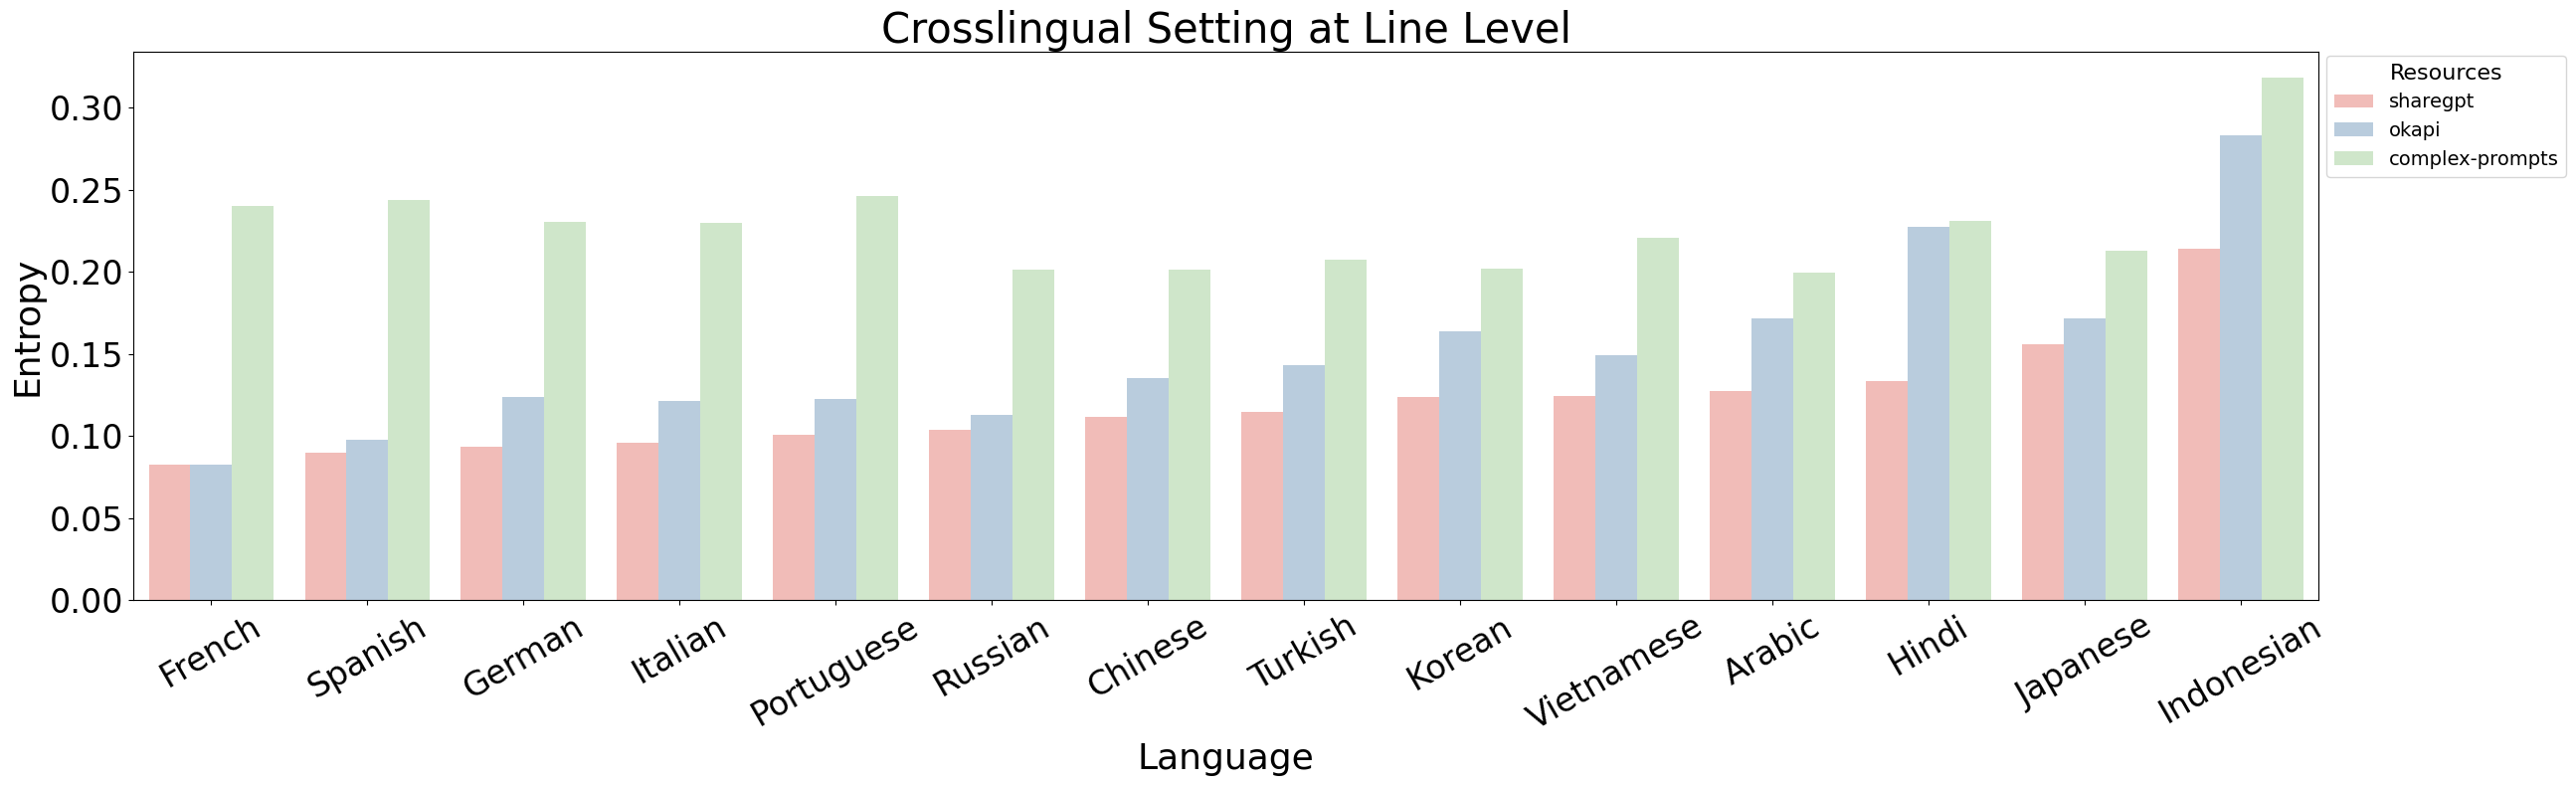

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_eval_lang_entropy_melted contains columns: 'language', 'entropy', 'step', and 'f1_score'

# Create the figure and the first axis (for entropy)
fig, ax = plt.subplots(figsize=(26, 8))  # Define figure and axis

# Plot the barplot for entropy on the first axis
p = sns.barplot(x='Language', y='entropy_avg_source', width=0.8, data=df_line_cross_source, hue="source", palette="Pastel1", errorbar=None, ax=ax)


# for patch, (source) in zip(p.patches, df_line_cross_['source']):
#     # if source == "okapi":
#     #     patch.set_hatch("/")
    
#     if source == "sharegpt":
#         patch.set_hatch('\\')

#     elif source == "complex-prompts":
#         patch.set_hatch('/')
        


# Customize the first y-axis (for entropy)
ax.set_ylabel('Entropy', fontsize=26)
ax.set_xlabel('Language', fontsize=26)
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)
plt.xticks(rotation=30)

# Add the title
plt.title('Crosslingual Setting at Line Level', fontsize=30)

# Add the legend for the steps (can be adjusted for both y-axes)
ax.legend(title="Resources", fontsize=14, title_fontsize=16, loc='upper left', bbox_to_anchor=(1.002, 1), borderaxespad=0.2)
# ax2.legend(title="BLEU", fontsize=14, title_fontsize=16, loc='upper right', bbox_to_anchor=(1.25, 0.9), borderaxespad=0.2)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('../plots/prompts/crosslingual_line_level_by_resource.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [129]:
df_line_cross_llm = df_line_cross_llm.sort_values(["entropy_avg_llm"])

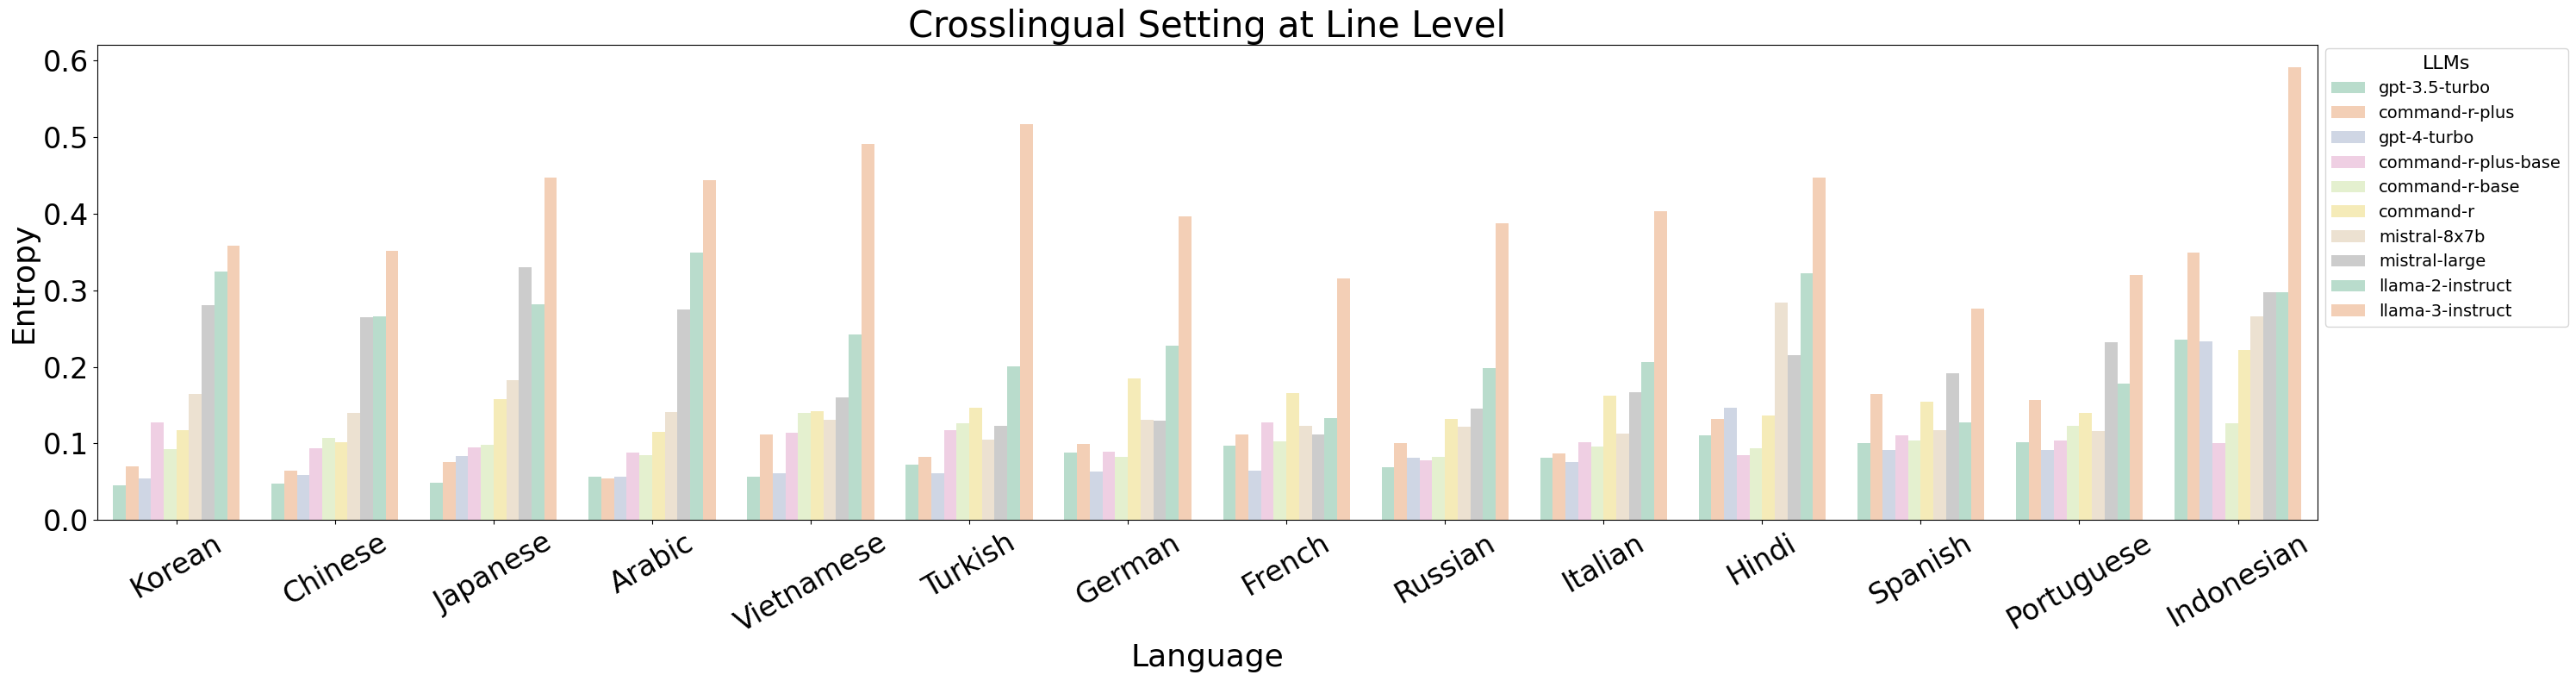

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_eval_lang_entropy_melted contains columns: 'language', 'entropy', 'step', and 'f1_score'

# Create the figure and the first axis (for entropy)
fig, ax= plt.subplots(figsize=(30, 8))

# Plot the barplot for entropy on the first axis
p = sns.barplot(x='Language', y='entropy_avg_llm', width=0.8, data=df_line_cross_llm, hue="LLM", palette="Pastel2", errorbar=None, ax=ax)

# Add hatches to the bars
# hatches = '/'
# step_with_hatch = "mistral-large"
# for patch, (step) in zip(p.patches, df_line_cross_['LLM']):
#     if step == "gpt-3.5-turbo":
#         patch.set_hatch("/")
        
#     if step == "command-r-plus-base":
#         patch.set_hatch('\\')

# Customize the first y-axis (for entropy)
ax.set_ylabel('Entropy', fontsize=26)
ax.set_xlabel('Language', fontsize=26)
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)
plt.xticks(rotation=30)

# Add the title
plt.title('Crosslingual Setting at Line Level', fontsize=30)

# Add the legend for the steps (can be adjusted for both y-axes)
p.legend(title="LLMs", fontsize=14, title_fontsize=16, loc='upper left', bbox_to_anchor=(1.002, 1), borderaxespad=0.2)
# ax2.legend(title="BLEU", fontsize=14, title_fontsize=16, loc='upper right', bbox_to_anchor=(1.25, 0.9), borderaxespad=0.2)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('../plots/prompts/crosslingual_line_level_by_llm.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


# check whether the eval language is in the training data

In [119]:
df_mult_base["eval_lang_in_training"]= df_mult_base.apply(lambda row: filter_lang(row), axis=1)
df_mult_step1["eval_lang_in_training"]= df_mult_step1.apply(lambda row: filter_lang(row), axis=1)
df_mult_step50["eval_lang_in_training"]= df_mult_step50.apply(lambda row: filter_lang(row), axis=1)

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_1697/539800339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mult_base["eval_lang_in_training"]= df_mult_base.apply(lambda row: filter_lang(row), axis=1)
/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_1697/539800339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mult_step1["eval_lang_in_training"]= df_mult_step1.apply(lambda row: filter_lang(row), axis=1)
/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_1697/53

In [120]:
len(df_mult_base), len(df_mult_step1),len(df_mult_step50),

(609, 609, 609)

In [121]:
df_mult_base_crosslingual = df_mult_base[df_mult_base["eval_lang_in_training"]==False]
df_mult_step1_crosslingual = df_mult_step1[df_mult_step1["eval_lang_in_training"]==False]
df_mult_step50_crosslingual = df_mult_step50[df_mult_step50["eval_lang_in_training"]==False]

In [189]:
df_mult_base_crosslingual

,model,training,eval_lang,step,pred_langs,emb_cos_sim,training_langs,train_eval_langs,eval_lang_in_training
694,me5_arb_Arab,[arb_Arab],amh,Base,"{'eng': 0.07, 'ara': 0.77, 'fra': 0.1, 'deu': ...",0.788960,[arb],arb_amh,False
730,me5_arb_Arab,[arb_Arab],cmn,Base,"{'zho': 0.75, 'fas': 0.01, 'ara': 0.1, 'eng': ...",0.899977,[arb],arb_cmn,False
678,me5_arb_Arab,[arb_Arab],deu,Base,"{'deu': 0.94, 'eng': 0.02, 'ara': 0.02, 'fra':...",0.916156,[arb],arb_deu,False
710,me5_arb_Arab,[arb_Arab],guj,Base,"{'ara': 0.84, 'eng': 0.12}",0.875998,[arb],arb_guj,False
686,me5_arb_Arab,[arb_Arab],heb,Base,"{'ara': 0.93, 'eng': 0.02, 'fra': 0.03, 'heb':...",0.889889,[arb],arb_heb,False
...,...,...,...,...,...,...,...,...,...
1274,me5_urd_pan,"[urd_Arab, pan_Guru]",tur,Base,"{'pan': 0.24, 'tur': 0.08, 'fas': 0.03, 'eng':...",0.841144,"[urd, pan]",urd_pan_tur,False
1234,me5_urd_pan,"[urd_Arab, pan_Guru]",ydd,Base,"{'pan': 0.87, 'ara': 0.01, 'urd': 0.1, 'eng': ...",0.906170,"[urd, pan]",urd_pan_ydd,False
358,me5_urd_Arab,[urd_Arab],sin,Base,"{'urd': 0.95, 'fas': 0.01, 'eng': 0.03}",0.910892,[urd],urd_sin,False
366,me5_urd_Arab,[urd_Arab],tur,Base,"{'urd': 0.74, 'tur': 0.01, 'pnb': 0.01, 'eng':...",0.869960,[urd],urd_tur,False


# Predicted languages and their distributions from all the steps

In [122]:
from collections import defaultdict
lang2dist_base=defaultdict(list)
lang2dist_step1 = defaultdict(list)
lang2dist_step50= defaultdict(list)

for pred_langs, pred_lang, training_langs in zip(df_mult_base_crosslingual["pred_langs"],df_mult_base_crosslingual["eval_lang"], df_mult_base_crosslingual["training_langs"]) :
    for k, v in pred_langs.items():
        # get crosslingual prediction language distribution not counting the training data and
        if k!=pred_lang and k not in training_langs:
            # if k=="mar":
                # print(training_langs, pred_lang, pred_langs)
            lang2dist_base[k].append(v)b
            

for pred_langs, pred_lang, training_langs in zip(df_mult_step1_crosslingual["pred_langs"],df_mult_step1_crosslingual["eval_lang"], df_mult_step1_crosslingual["training_langs"]) :
    for k, v in pred_langs.items():
        # get crosslingual prediction language distribution not counting the training data and
        if k!=pred_lang and k not in training_langs:
            # if k=="mar":
                # print(training_langs, pred_lang, pred_langs)
            lang2dist_step1[k].append(v)

for pred_langs, pred_lang, training_langs in zip(df_mult_step50_crosslingual["pred_langs"],df_mult_step50_crosslingual["eval_lang"], df_mult_step50_crosslingual["training_langs"]) :
    for k, v in pred_langs.items():
        # get crosslingual prediction language distribution not counting the training data and
        if k!=pred_lang and k not in training_langs:
            # if k=="mar":
                # print(training_langs, pred_lang, pred_langs)
            lang2dist_step50[k].append(v)

In [123]:
lang2dist_base_avg= {k: np.mean(v) for k,v in lang2dist_base.items()}
lang2dist_step1_avg= {k: np.mean(v) for k,v in lang2dist_step1.items()}
lang2dist_step50_avg= {k: np.mean(v) for k,v in lang2dist_step50.items()}

In [124]:
len(lang2dist_base_avg), len(lang2dist_step1_avg), len(lang2dist_step50_avg)

(82, 76, 79)

In [133]:
df_lang2dist_base = pd.DataFrame.from_dict(lang2dist_base_avg, orient="index").rename(columns={0:"Base"})
df_lang2dist_step1 = pd.DataFrame.from_dict(lang2dist_step1_avg, orient="index").rename(columns={0:"Step1"})
df_lang2dist_step50= pd.DataFrame.from_dict(lang2dist_step50_avg, orient="index").rename(columns={0:"Step50+sbeam8"})

In [167]:
df_ = df_lang2dist_base.join(df_lang2dist_step1)

In [188]:
df_

,Base,Step1,Step50+sbeam8,lang,mt5
zho,0.274622,0.349778,0.351807,zho,1.67
ara,0.234556,0.258409,0.250549,ara,1.66
eng,0.114952,0.099469,0.099899,eng,5.67
mar,0.070737,0.077241,0.077727,mar,0.93
rus,0.051017,0.052617,0.050000,rus,3.71
tur,0.044828,0.030000,0.026765,tur,1.93
ben,0.032500,0.035455,0.031250,ben,0.91
fas,0.026622,0.024091,0.025185,fas,1.67
deu,0.025231,0.021071,0.018667,deu,3.05
jpn,0.024138,0.028571,0.023889,jpn,1.92


In [168]:
df_ = df_.join(df_lang2dist_step50)

In [169]:
len(df_[df_>0.01].dropna())

26

In [170]:
lang2percent = {'zho':1.67, 'ara':1.66 , 'eng':5.67, 'mar':0.93, 'rus':3.71, 'tur':1.93, 'ben':0.91, 'fas':1.67, 'deu':3.05, 'jpn':1.92,
       'pol':2.15, 'spa':3.09, 'fra':2.89, 'swe':1.61, 'kor':1.14, 'ces':1.72, 'bul':1.29, 'ita':2.43, 'slk':1.19, 'aze':0.82,
       'ukr':1.51, 'fin':1.35, 'nld':1.98, 'tgl':0.52, 'mkd':0.62, 'epo':0.4}

In [172]:
df_= df_[df_>0.01].dropna().sort_values(by="Base", ascending=False)

In [173]:
df_["lang"]=df_.index
df_["mt5"]= df_["lang"].apply(lambda x: lang2percent[x])

In [177]:
df_.to_csv("../datasets/inversion_language_confusion/multi_langdist_line_level.csv" )

In [187]:
df_

,Base,Step1,Step50+sbeam8,lang,mt5
zho,0.274622,0.349778,0.351807,zho,1.67
ara,0.234556,0.258409,0.250549,ara,1.66
eng,0.114952,0.099469,0.099899,eng,5.67
mar,0.070737,0.077241,0.077727,mar,0.93
rus,0.051017,0.052617,0.050000,rus,3.71
tur,0.044828,0.030000,0.026765,tur,1.93
ben,0.032500,0.035455,0.031250,ben,0.91
fas,0.026622,0.024091,0.025185,fas,1.67
deu,0.025231,0.021071,0.018667,deu,3.05
jpn,0.024138,0.028571,0.023889,jpn,1.92


In [186]:
lang2probs = dict()

for train_lang, eval_lang, pred_langs in zip(df_mult_base["training_langs"], df_mult_base["eval_lang"], df_mult_base["pred_langs"]):
    if eval_lang=="deu":
        print(train_lang, eval_lang, pred_langs)

['arb'] deu {'deu': 0.94, 'eng': 0.02, 'ara': 0.02, 'fra': 0.01, 'nld': 0.01}
['cmn'] deu {'zho': 0.84, 'deu': 0.09, 'eng': 0.05}
['cmn', 'jpn'] deu {'deu': 0.86, 'jpn': 0.09, 'zho': 0.01, 'eng': 0.02}
['deu'] deu {'deu': 1.0}
['deu', 'tur'] deu {'deu': 1.0}
['guj'] deu {'eng': 0.56, 'guj': 0.4, 'fra': 0.01, 'deu': 0.01}
['heb', 'arb'] deu {'deu': 0.97, 'eng': 0.02}
['heb'] deu {'deu': 0.29, 'heb': 0.65, 'eng': 0.05, 'fra': 0.01}
['hin'] deu {'eng': 0.27, 'deu': 0.34, 'hin': 0.24, 'fra': 0.01, 'nld': 0.01, 'fin': 0.01, 'mar': 0.02, 'nep': 0.01}
['hin', 'guj'] deu {'deu': 0.58, 'eng': 0.21, 'hin': 0.11, 'nld': 0.01, 'fra': 0.01, 'tgl': 0.01, 'guj': 0.01, 'mar': 0.01}
['hin', 'pan'] deu {'eng': 0.25, 'deu': 0.28, 'hin': 0.27, 'mar': 0.04, 'fra': 0.02, 'nld': 0.03, 'nep': 0.01}
['jpn'] deu {'deu': 0.62, 'jpn': 0.34, 'zho': 0.01, 'eng': 0.02}
['kaz'] deu {'kaz': 0.16, 'eng': 0.06, 'deu': 0.68, 'fra': 0.01, 'ukr': 0.03, 'rus': 0.01}
['kaz', 'guj'] deu {'deu': 0.83, 'eng': 0.09, 'guj': 0.02,

In [179]:
df_

,Base,Step1,Step50+sbeam8,lang,mt5
zho,0.274622,0.349778,0.351807,zho,1.67
ara,0.234556,0.258409,0.250549,ara,1.66
eng,0.114952,0.099469,0.099899,eng,5.67
mar,0.070737,0.077241,0.077727,mar,0.93
rus,0.051017,0.052617,0.050000,rus,3.71
tur,0.044828,0.030000,0.026765,tur,1.93
ben,0.032500,0.035455,0.031250,ben,0.91
fas,0.026622,0.024091,0.025185,fas,1.67
deu,0.025231,0.021071,0.018667,deu,3.05
jpn,0.024138,0.028571,0.023889,jpn,1.92


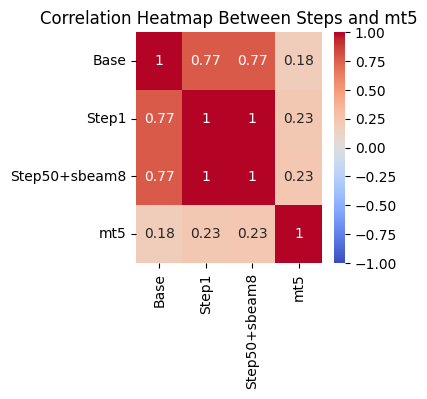

In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your dataframe as 'df' with the 'Base', 'Step1', 'Step50+sbeam8', and 'mt5' columns
# Example correlation calculation
correlation = df_[['Base', 'Step1', 'Step50+sbeam8', 'mt5']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(3,3))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap Between Steps and mt5')
plt.show()


In [3]:
data_dir = "../datasets/inversion_language_confusion/langdist_data_all_langs"

lang_dist = defaultdict(list)
for filename in tqdm(os.listdir(data_dir)):
    if filename.endswith(".csv"):
        filepath = os.path.join(data_dir, filename)
        df = pd.read_csv(filepath)
        df["pred_langs"]= df["pred_langs"].apply(literal_eval)
        for d in df["pred_langs"].tolist():
            for lang, dist in d.items():
                lang_dist[lang].append(dist)
        
    
    

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.03it/s]


In [19]:
lang_dist["tha"]

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

In [26]:
langs= list(set(lang_dist.keys()))

In [32]:
import json
with open("../datasets/inversion_language_confusion/langs.json", "w") as f:
    json.dump(langs,f)

with open("../datasets/inversion_language_confusion/lang_dist.json", "w") as f:
    json.dump(lang_dist, f)

In [29]:
lang_dist_filter = {lang:[x for x in dist if x>=0.01] for lang, dist in lang_dist.items()}

In [23]:
lang_dist_filter["tha"]

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

In [33]:
lang_dist_filter

{'deu': [0.82,
  0.27,
  0.23,
  0.2,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.02,
  0.01,
  0.01,
  0.01,
  0.04,
  0.03,
  0.04,
  0.04,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.02,
  0.02,
  0.01,
  0.02,
  0.01,
  0.01,
  0.01,
  0.01,
  0.04,
  0.01,
  0.01,
  0.01,
  0.08,
  0.01,
  0.01,
  0.01,
  0.03,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.03,
  0.04,
  0.05,
  0.04,
  0.02,
  0.03,
  0.04,
  0.04,
  0.02,
  0.02,
  0.02,
  0.02,
  0.82,
  0.71,
  0.01,
  0.01,
  0.01,
  0.02,
  0.02,
  0.02,
  0.04,
  0.03,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.02,
  0.03,
  0.01,
  0.01,
  0.04,
  0.02,
  0.08,
  0.03,
  0.03,
  0.02,
  0.01,
  0.01,
  0.03,
  0.03,
  0.02,
  0.02,
  0.03,
  0.82,
  0.14,
  0.06,
  0.05,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.02,
  0.02,
  0.01,
  0.01,
  0.01,
  0.04,
  0.02,
  0.02,
  0.02,
  0.01,
  0.01,
  

In [203]:
with open("../src/languageConfusion/lang2file.yaml") as f:
    lang2file = yaml.safe_load(f)

In [204]:
langs = [x.split("_")[0] for x in list(lang2file.keys())]

In [205]:
# languages in the inversion results

In [206]:
langs = ['deu',
 'ydd',
 'heb',
 'arb',
 'amh',
 'mlt',
 'hin',
 'urd',
 'guj',
 'sin',
 'pan',
 'tur',
 'kaz',
 'cmn',
 'jpn',
 'kor',
 'mon',
 'hun',
 'mhr',
 'fin']

In [312]:
len(langs)

20

In [208]:
df = pd.read_csv("../datasets/inversion_language_confusion/line_level/mono/train_data.csv")

In [257]:
df_wals = pd.read_csv("../datasets/data_for_graph/WALS/wals_lang2features.csv")

In [256]:
df_gb = pd.read_csv("../datasets/data_for_graph/Grambank/grambank_lang2features.csv")

In [258]:
df_langs = pd.read_csv("../datasets/languages/languoid.csv")

In [259]:
glottocode2iso3 = dict(zip(df_langs["id"], df_langs["iso639P3code"]))

In [260]:
glottocode2iso3["stan1295"]

'deu'

In [313]:
glottocode2iso3_langs = {idx:code for idx,code in glottocode2iso3.items() if code in langs}

In [315]:
len(glottocode2iso3_langs)

20

In [316]:
glottocode2iso3_langs

{'amha1245': 'amh',
 'east2295': 'ydd',
 'east2328': 'mhr',
 'finn1318': 'fin',
 'guja1252': 'guj',
 'hebr1245': 'heb',
 'hind1269': 'hin',
 'hung1274': 'hun',
 'kaza1248': 'kaz',
 'kore1280': 'kor',
 'malt1254': 'mlt',
 'mand1415': 'cmn',
 'mong1331': 'mon',
 'nucl1301': 'tur',
 'nucl1643': 'jpn',
 'panj1256': 'pan',
 'sinh1246': 'sin',
 'stan1295': 'deu',
 'stan1318': 'arb',
 'urdu1245': 'urd'}

In [261]:
df_langs[df_langs["iso639P3code"]=="deu"]

,id,family_id,parent_id,name,bookkeeping,level,latitude,longitude,iso639P3code,description,markup_description,child_family_count,child_language_count,child_dialect_count,country_ids
21955,stan1295,indo1319,glob1243,German,False,language,48.649,12.4676,deu,NaN,NaN,0,0,3,AT BE CH CZ DE DK FR HU IT LI LU NL PL RO SI SK


In [262]:
"deu" in df_langs["iso639P3code"].tolist()

True

# Grambank features Selection

In [263]:
df_gb["iso639P3code"]=df_gb["Lang_ID"].map(glottocode2iso3)

In [264]:
df_gb_langs = df_gb[df_gb["iso639P3code"].isin(langs)]

In [265]:
df_gb_langs

,Lang_ID,GB020,GB021,GB022,GB023,GB024,GB025,GB026,GB027,GB028,...,GB422,GB430,GB431,GB432,GB433,GB519,GB520,GB521,GB522,iso639P3code
74,amha1245,1,1,1,1,1,1,-1,-1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,amh
609,finn1318,0,0,0,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,1,fin
732,hebr1245,1,0,1,0,3,2,0,-1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,heb
743,hind1269,0,0,0,0,1,1,-1,1,0,...,0,0,0,0,0,0,0,0,0,hin
771,hung1274,1,1,1,0,1,1,-1,1,0,...,0,0,0,1,1,0,0,0,1,hun
995,kore1280,0,0,0,0,2,1,-1,1,0,...,1,0,0,1,0,0,0,0,1,kor
1220,malt1254,1,0,1,0,1,1,0,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,mlt
1231,mand1415,0,0,0,0,1,1,0,1,1,...,0,0,0,0,0,1,1,0,1,cmn
1552,nucl1301,0,0,1,0,1,1,1,0,0,...,0,0,0,1,1,0,0,0,1,tur
1573,nucl1643,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,jpn


In [110]:
"deu" in df_gb["iso639P3code"].tolist()

False

In [117]:
len(langs)

20

In [283]:
langs

['deu',
 'ydd',
 'heb',
 'arb',
 'amh',
 'mlt',
 'hin',
 'urd',
 'guj',
 'sin',
 'pan',
 'tur',
 'kaz',
 'cmn',
 'jpn',
 'kor',
 'mon',
 'hun',
 'mhr',
 'fin']

In [266]:
df_gb_langs.replace({-1:np.nan}, inplace=True)

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_98083/1438578068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gb_langs.replace({-1:np.nan}, inplace=True)


In [138]:
len(df_gb_langs.dropna(axis=1).columns) # 93 features exist in all languages.

93

In [136]:
df_gb_langs.dropna(axis=1).to_csv("../datasets/inversion_language_confusion/gb_features_nona.csv", index=False)

### threshold 0.75 for languages coverage by features

In [267]:
gb_features = [x for x in df_gb.columns if x.startswith("GB")]

In [268]:
tot_feats= len(gb_features)
print(f"total features {tot_feats}")
perc = 0.75
cols_gb=[]
for col in gb_features:
    no_data = df_gb_langs[col].to_list().count(-1)
    if (tot_feats-no_data)>=(perc*tot_feats):
        # print(col, no_data)
        cols_gb.append(col)
    

total features 195


In [269]:
len(cols_gb)

195

In [270]:
df_gb_langs

,Lang_ID,GB020,GB021,GB022,GB023,GB024,GB025,GB026,GB027,GB028,...,GB422,GB430,GB431,GB432,GB433,GB519,GB520,GB521,GB522,iso639P3code
74,amha1245,1,1,1,1,1,1,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amh
609,finn1318,0,0,0,0,1,1,0.0,1.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,fin
732,hebr1245,1,0,1,0,3,2,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,heb
743,hind1269,0,0,0,0,1,1,NaN,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hin
771,hung1274,1,1,1,0,1,1,NaN,1.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,hun
995,kore1280,0,0,0,0,2,1,NaN,1.0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,kor
1220,malt1254,1,0,1,0,1,1,0.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mlt
1231,mand1415,0,0,0,0,1,1,0.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,cmn
1552,nucl1301,0,0,1,0,1,1,1.0,0.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,tur
1573,nucl1643,0,0,0,0,1,1,0.0,0.0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,jpn


In [271]:
df_gb_langs.to_csv("../datasets/inversion_language_confusion/gb_features.csv",index=False)

# WALS features

In [298]:
df_wals["iso639P3code"]=df_wals["Glottocode"].map(glottocode2iso3)

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_98083/2623327401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wals["iso639P3code"]=df_wals["Glottocode"].map(glottocode2iso3)


In [299]:
"deu" in df_wals["iso639P3code"].tolist()

True

In [300]:
df_wals[df_wals["iso639P3code"]=="deu"]

,Glottocode,Family,Genus,Consonant Inventories,Vowel Quality Inventories,Consonant-Vowel Ratio,Voicing in Plosives and Fricatives,Voicing and Gaps in Plosive Systems,Uvular Consonants,Glottalized Consonants,...,SNegOV Order,SONegV Order,SOVNeg Order,The Position of Negative Morphemes in Verb-Initial Languages,Double negation in verb-initial languages,Verb-Initial with Preverbal Negative,Verb-Initial with Negative that is Immediately Postverbal or between Subject and Object,Verb-Initial with Clause-Final Negative,The Position of Negative Morphemes in Object-Initial Languages,iso639P3code
iso639P3code,,,,,,,,,,,,,,,,,,,,,
deu,stan1295,22,158,0,1,4,3,1,2,1,...,0,1,1,-1,-1,-1,-1,-1,-1,deu


In [280]:
df_wals

,Glottocode,Family,Genus,Consonant Inventories,Vowel Quality Inventories,Consonant-Vowel Ratio,Voicing in Plosives and Fricatives,Voicing and Gaps in Plosive Systems,Uvular Consonants,Glottalized Consonants,...,SNegOV Order,SONegV Order,SOVNeg Order,The Position of Negative Morphemes in Verb-Initial Languages,Double negation in verb-initial languages,Verb-Initial with Preverbal Negative,Verb-Initial with Negative that is Immediately Postverbal or between Subject and Object,Verb-Initial with Clause-Final Negative,The Position of Negative Morphemes in Object-Initial Languages,iso639P3code
0,miri1266,0,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,mep
1,sikk1242,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,sip
2,trum1247,2,2,0,0,0,0,0,-1,0,...,0,0,0,-1,-1,-1,-1,-1,-1,tpy
3,weme1239,3,3,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,wem
4,kore1273,4,4,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,kvk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,muri1260,52,281,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,mtf
2428,embe1260,153,362,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,cto
2429,elna1235,71,492,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,crn
2430,acha1250,12,159,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,aca


In [231]:
df_wals.index = df_wals["iso639P3code"]

In [301]:
df_wals=df_wals[df_wals["iso639P3code"].isin(langs)]

In [302]:
df_wals

,Glottocode,Family,Genus,Consonant Inventories,Vowel Quality Inventories,Consonant-Vowel Ratio,Voicing in Plosives and Fricatives,Voicing and Gaps in Plosive Systems,Uvular Consonants,Glottalized Consonants,...,SNegOV Order,SONegV Order,SOVNeg Order,The Position of Negative Morphemes in Verb-Initial Languages,Double negation in verb-initial languages,Verb-Initial with Preverbal Negative,Verb-Initial with Negative that is Immediately Postverbal or between Subject and Object,Verb-Initial with Clause-Final Negative,The Position of Negative Morphemes in Object-Initial Languages,iso639P3code
iso639P3code,,,,,,,,,,,,,,,,,,,,,
mlt,malt1254,16,61,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,mlt
sin,sinh1246,22,50,0,1,0,0,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,sin
tur,nucl1301,39,59,0,1,0,3,1,-1,1,...,0,0,4,-1,-1,-1,-1,-1,-1,tur
fin,finn1318,47,88,1,1,1,3,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,fin
guj,guja1252,22,50,-1,-1,-1,-1,-1,-1,-1,...,0,1,1,-1,-1,-1,-1,-1,-1,guj
hun,hung1274,47,234,2,1,0,3,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,hun
pan,panj1256,22,50,-1,-1,-1,-1,-1,-1,-1,...,0,1,1,-1,-1,-1,-1,-1,-1,pan
mhr,east2328,47,278,0,1,0,2,0,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,mhr
jpn,nucl1643,136,306,1,0,0,3,1,2,1,...,0,0,4,-1,-1,-1,-1,-1,-1,jpn


In [303]:
features = df_wals.columns.tolist()

In [304]:
features.remove("Glottocode")
features.remove("iso639P3code")

In [305]:
features

['Family',
 'Genus',
 'Consonant Inventories',
 'Vowel Quality Inventories',
 'Consonant-Vowel Ratio',
 'Voicing in Plosives and Fricatives',
 'Voicing and Gaps in Plosive Systems',
 'Uvular Consonants',
 'Glottalized Consonants',
 'Lateral Consonants',
 'The Velar Nasal',
 'Vowel Nasalization',
 'Nasal Vowels in West Africa',
 'Front Rounded Vowels',
 'Syllable Structure',
 'Tone',
 'Fixed Stress Locations',
 'Weight-Sensitive Stress',
 'Weight Factors in Weight-Sensitive Stress Systems',
 'Rhythm Types',
 'Absence of Common Consonants',
 'Presence of Uncommon Consonants',
 'Fusion of Selected Inflectional Formatives',
 'Exponence of Selected Inflectional Formatives',
 'Exponence of Tense-Aspect-Mood Inflection',
 'Inflectional Synthesis of the Verb',
 'Locus of Marking in the Clause',
 'Locus of Marking in Possessive Noun Phrases',
 'Locus of Marking: Whole-language Typology',
 'Zero Marking of A and P Arguments',
 'Prefixing vs. Suffixing in Inflectional Morphology',
 'Reduplication

In [306]:
tot_feats= len(features)
print(f"total features {tot_feats}")
perc = 0.25
for i, row in df_wals.iterrows():
    no_data = row[features].to_list().count(-1)
    if (tot_feats-no_data)<(perc*tot_feats):
        print(i, no_data)
    else:
        print(i, no_data)

total features 194
mlt 153
sin 150
tur 44
fin 44
guj 154
hun 43
pan 118
mhr 150
jpn 47
deu 38
urd 152
hin 54
arb 165
kaz 183
kor 50
amh 97
heb 54
cmn 46


# The features that are present in most of the relevant languages
- threshold =0.75

In [307]:
print(len(df_wals))
langs_exist = len(df_wals)
cols = []
for col in features:
    no_data = df_wals[col].to_list().count(-1)
    if (langs_exist - no_data) >= (0.75*langs_exist):
    
        print(col, langs_exist - no_data)
        cols.append(col)

18
Family 18
Genus 18
Prefixing vs. Suffixing in Inflectional Morphology 14
The Associative Plural 15
Intensifiers and Reflexive Pronouns 14
Position of Case Affixes 15
Position of Tense-Aspect Affixes 15
The Morphological Imperative 14
The Optative 14
Order of Subject, Object and Verb 15
Order of Subject and Verb 15
Order of Object and Verb 16
Order of Adposition and Noun Phrase 16
Order of Genitive and Noun 14
Order of Adjective and Noun 16
Order of Demonstrative and Noun 14
Order of Numeral and Noun 15
Order of Degree Word and Adjective 14
Order of Adverbial Subordinator and Clause 14
Relationship between the Order of Object and Verb and the Order of Adposition and Noun Phrase 16
Relationship between the Order of Object and Verb and the Order of Adjective and Noun 16
Polar Questions 14
Tea 16
Order of Negative Morpheme and Verb 15
Position of Negative Word With Respect to Subject, Object, and Verb 14


In [310]:
df_wals[cols+["Glottocode"]].to_csv("../datasets/inversion_language_confusion/wals_features.csv")

In [289]:
df_wals[cols].to_csv("../datasets/inversion_language_confusion/wals_features.csv")

In [290]:
df_wals_cols = df_wals[cols]

In [291]:
df_wals_cols = df_wals_cols.drop(columns=["Family", "Genus"])

In [292]:
df = df_wals_cols.T

In [293]:
df 

,73,89,131,159,321,454,552,567,681,811,937,1091,1289,1617,1711,1773,1860,1885
Prefixing vs. Suffixing in Inflectional Morphology,-1,-1,1,1,-1,1,1,1,1,1,1,1,1,-1,1,5,5,1
The Associative Plural,1,0,0,3,-1,2,0,2,0,1,-1,3,-1,0,0,2,3,1
Intensifiers and Reflexive Pronouns,0,0,0,0,0,0,0,-1,0,1,-1,0,-1,-1,0,0,0,0
Position of Case Affixes,-1,0,0,0,-1,0,0,0,1,0,2,0,0,-1,0,0,5,2
Position of Tense-Aspect Affixes,-1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,1,2,2,1
The Morphological Imperative,2,-1,2,2,2,0,2,2,1,3,-1,2,-1,-1,1,2,2,0
The Optative,-1,-1,0,0,0,0,0,0,0,0,0,0,-1,0,0,-1,0,0
"Order of Subject, Object and Verb",-1,1,1,3,1,0,1,-1,1,0,1,1,2,-1,1,1,3,3
Order of Subject and Verb,-1,0,0,0,0,0,0,-1,0,0,0,0,1,-1,0,0,0,0
Order of Object and Verb,-1,0,0,2,0,2,0,0,0,1,0,0,2,-1,0,0,2,2


/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_98083/1436071949.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


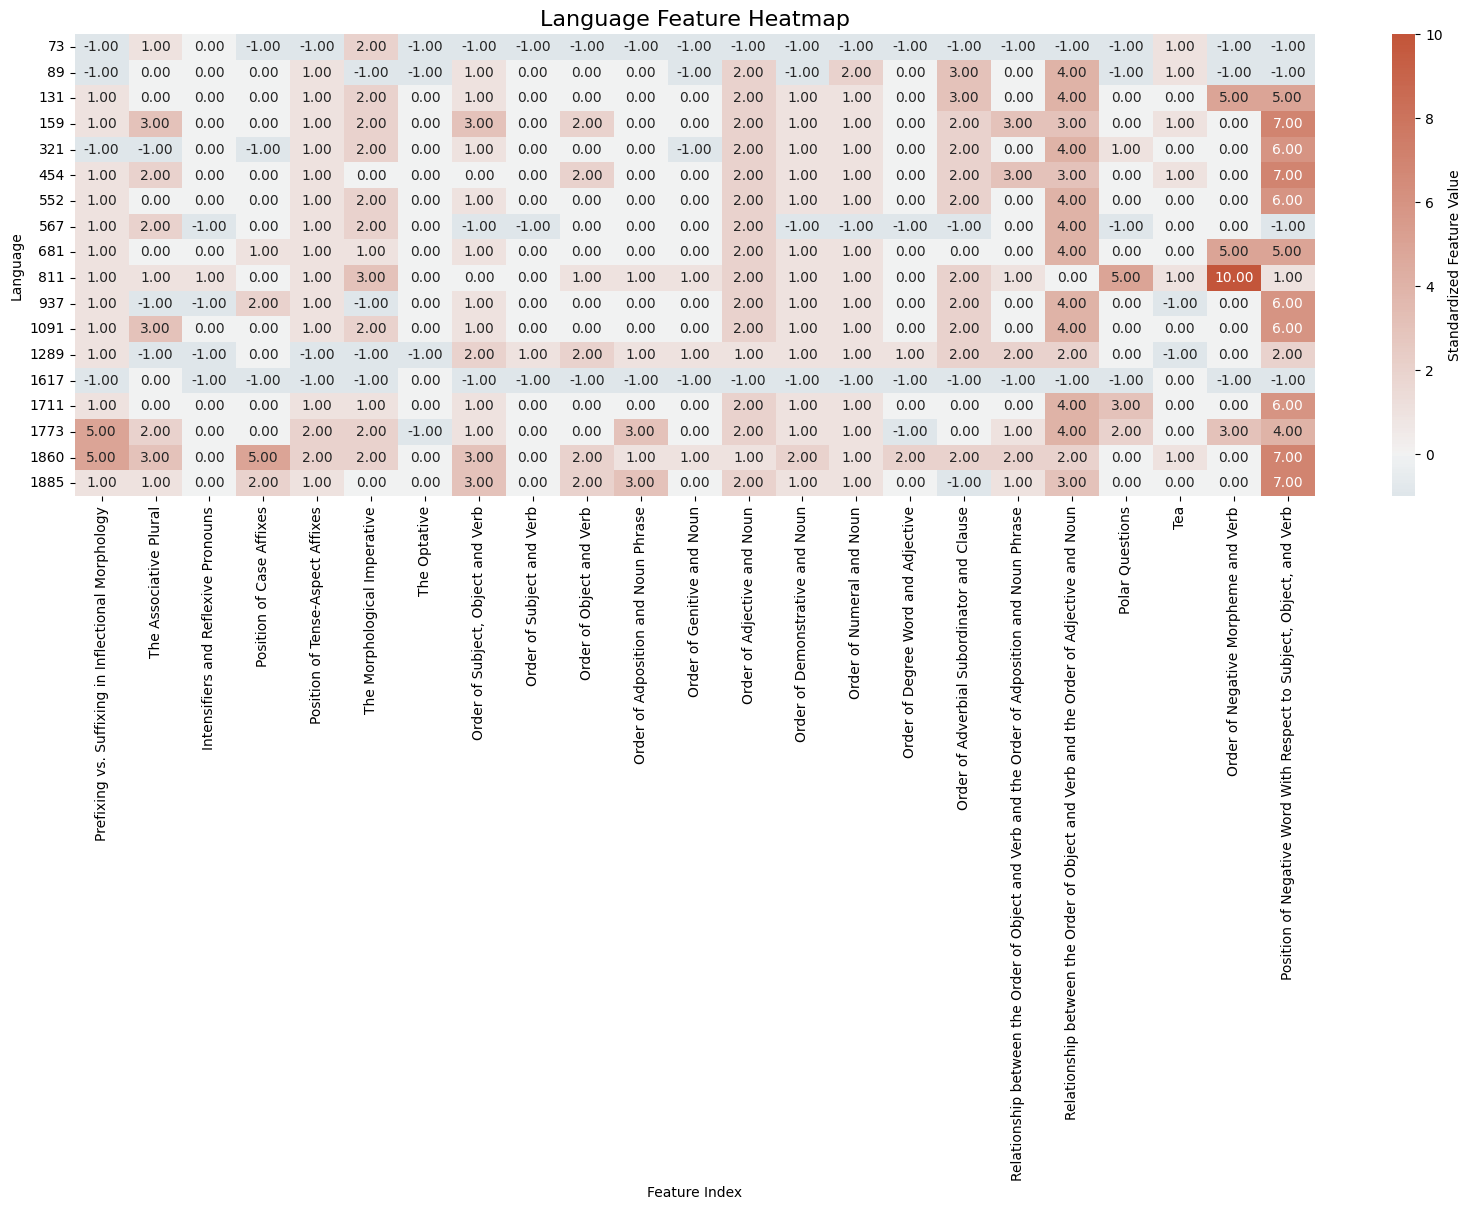


Feature Statistics:
                                                        mean       std  min  \
Prefixing vs. Suffixing in Inflectional Morphology  1.000000  1.680336 -1.0   
The Associative Plural                              0.833333  1.382666 -1.0   
Intensifiers and Reflexive Pronouns                -0.166667  0.514496 -1.0   
Position of Case Affixes                            0.388889  1.419979 -1.0   
Position of Tense-Aspect Affixes                    0.777778  0.878204 -1.0   
The Morphological Imperative                        1.055556  1.349171 -1.0   
The Optative                                       -0.222222  0.427793 -1.0   
Order of Subject, Object and Verb                   0.944444  1.258955 -1.0   
Order of Subject and Verb                          -0.111111  0.471405 -1.0   
Order of Object and Verb                            0.500000  1.043185 -1.0   
Order of Adposition and Noun Phrase                 0.388889  1.092159 -1.0   
Order of Genitive and Noun     

In [294]:
plt.figure(figsize=(20, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.T, 
            cmap=cmap, 
            center=0,
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Standardized Feature Value'})

# Customize the plot
plt.xlabel('Feature Index')
plt.ylabel('Language')
plt.title('Language Feature Heatmap', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

# Print feature statistics
print("\nFeature Statistics:")
print(df.T.describe().T[['mean', 'std', 'min', 'max']])

# Clustering languages based on WALS features

In [297]:
df_wals.index= df_wals["iso639P3code"]

KeyError: 0

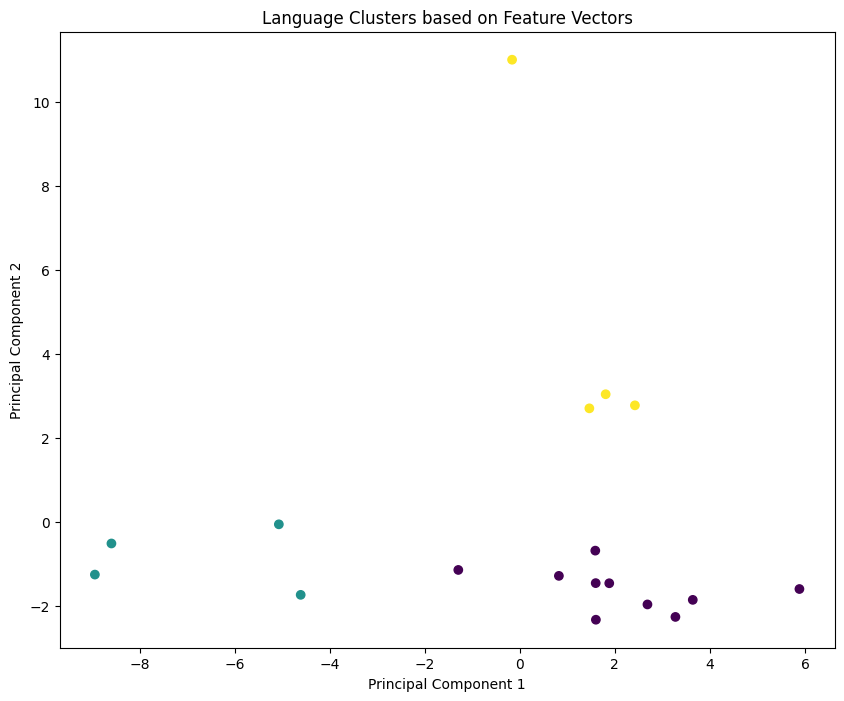

In [295]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 3  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df.T)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.T)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=df.T.index)
pca_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Language Clusters based on Feature Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add language labels to the points
for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), xytext=(5, 5), textcoords='offset points')

plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

# Print cluster assignments
print("\nCluster Assignments:")
for lang, cluster in zip(df.T.index, clusters):
    print(f"{lang}: Cluster {cluster}")

# Print feature importance
print("\nFeature Importance (based on KMeans cluster centers):")
feature_importance = pd.DataFrame(kmeans.cluster_centers_.T, index=df.T.columns, columns=[f'Cluster {i}' for i in range(n_clusters)])
print(feature_importance)


# Clustering Languages based on their Grambank features

In [195]:
df_gb_langs.index=df_gb_langs["iso639P3code"]

In [196]:
df_gb_langs = df_gb_langs.drop(columns=["iso639P3code", "Lang_ID"])

In [197]:
len(df_gb_langs)

12

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_98083/893129191.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), xytext=(5, 5), textcoords='offset points')


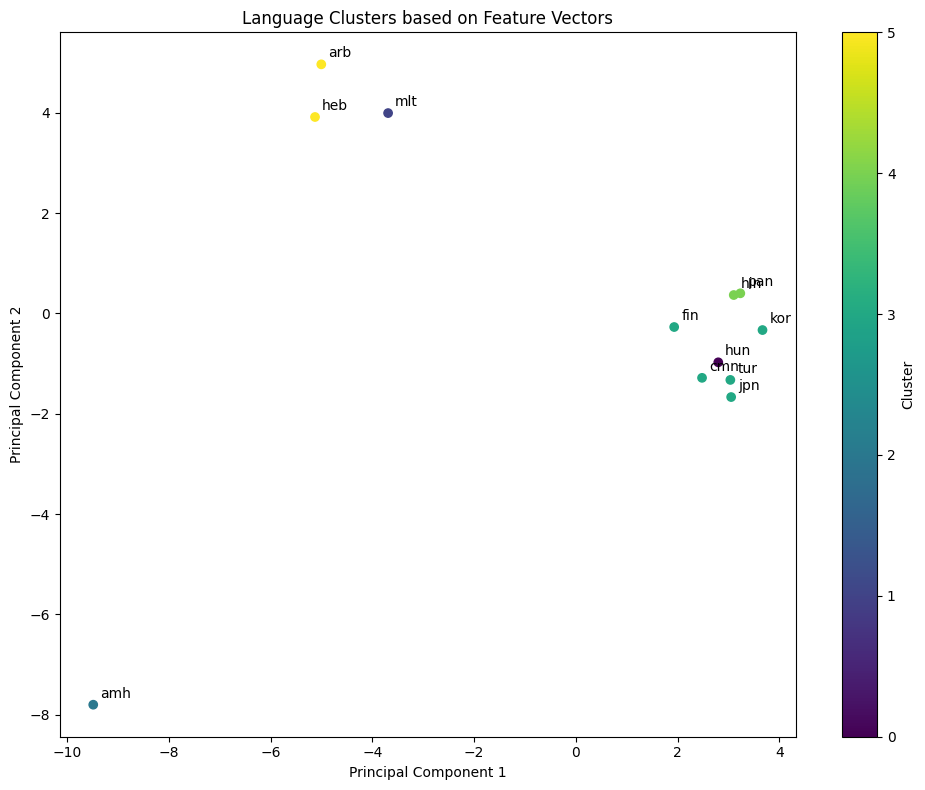


Cluster Assignments:
amh: Cluster 2
fin: Cluster 3
heb: Cluster 5
hin: Cluster 4
hun: Cluster 0
kor: Cluster 3
mlt: Cluster 1
cmn: Cluster 3
tur: Cluster 3
jpn: Cluster 3
pan: Cluster 4
arb: Cluster 5

Feature Importance (based on KMeans cluster centers):
       Cluster 0  Cluster 1  Cluster 2     Cluster 3  Cluster 4  Cluster 5
GB020        1.0        1.0        1.0 -5.551115e-17        0.0        1.0
GB021        1.0        0.0        1.0  0.000000e+00        0.0        0.5
GB022        1.0        1.0        1.0  2.000000e-01        0.0        1.0
GB023        0.0        0.0        1.0  0.000000e+00        0.0        0.5
GB024        1.0        1.0        1.0  1.200000e+00        1.0        3.0
...          ...        ...        ...           ...        ...        ...
GB433        1.0       -1.0       -1.0  4.000000e-01        0.0       -1.0
GB519        0.0       -1.0       -1.0  4.000000e-01        0.0       -1.0
GB520        0.0       -1.0       -1.0  2.000000e-01        0.0     

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 6  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_gb_langs)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_gb_langs)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=df_gb_langs.index)
pca_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Language Clusters based on Feature Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add language labels to the points
for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), xytext=(5, 5), textcoords='offset points')

plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

# Print cluster assignments
print("\nCluster Assignments:")
for lang, cluster in zip(df_gb_langs.index, clusters):
    print(f"{lang}: Cluster {cluster}")

# Print feature importance
print("\nFeature Importance (based on KMeans cluster centers):")
feature_importance = pd.DataFrame(kmeans.cluster_centers_.T, index=df_gb_langs.columns, columns=[f'Cluster {i}' for i in range(n_clusters)])
print(feature_importance)
